In [5]:
import pandas as pd
import numpy as np
from glob import glob
import os
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
# To display all the columns of the dataframe in the notebook
pd.pandas.set_option('display.max_columns',None)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix

from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras.preprocessing import image
# from keras.utils import np_utils

# Load images/Data

In [6]:
DATA_FOLDER = r"C:\Users\nico_\Desktop\udemy_CNN"

In [8]:
os.listdir(DATA_FOLDER)

['Black-grass',
 'Charlock',
 'Cleavers',
 'Common Chickweed',
 'Common wheat',
 'Fat Hen',
 'Loose Silky-bent',
 'Maize',
 'nonsegmentedv2',
 'Scentless Mayweed',
 'Shepherds Purse',
 'Small-flowered Cranesbill',
 'Sugar beet']

In [10]:
for i in os.listdir(DATA_FOLDER):
    class_folder_path = os.path.join(DATA_FOLDER, i)
    # pour trouver tous les fichiers avec une extension .png dans class_folder_path
    for image_path in glob(os.path.join(class_folder_path, "*.png")):
        print(image_path)

C:\Users\nico_\Desktop\udemy_CNN\Black-grass\1.png
C:\Users\nico_\Desktop\udemy_CNN\Black-grass\10.png
C:\Users\nico_\Desktop\udemy_CNN\Black-grass\100.png
C:\Users\nico_\Desktop\udemy_CNN\Black-grass\101.png
C:\Users\nico_\Desktop\udemy_CNN\Black-grass\102.png
C:\Users\nico_\Desktop\udemy_CNN\Black-grass\103.png
C:\Users\nico_\Desktop\udemy_CNN\Black-grass\104.png
C:\Users\nico_\Desktop\udemy_CNN\Black-grass\105.png
C:\Users\nico_\Desktop\udemy_CNN\Black-grass\106.png
C:\Users\nico_\Desktop\udemy_CNN\Black-grass\107.png
C:\Users\nico_\Desktop\udemy_CNN\Black-grass\108.png
C:\Users\nico_\Desktop\udemy_CNN\Black-grass\109.png
C:\Users\nico_\Desktop\udemy_CNN\Black-grass\11.png
C:\Users\nico_\Desktop\udemy_CNN\Black-grass\110.png
C:\Users\nico_\Desktop\udemy_CNN\Black-grass\111.png
C:\Users\nico_\Desktop\udemy_CNN\Black-grass\112.png
C:\Users\nico_\Desktop\udemy_CNN\Black-grass\113.png
C:\Users\nico_\Desktop\udemy_CNN\Black-grass\114.png
C:\Users\nico_\Desktop\udemy_CNN\Black-grass\115.p

In [17]:
images_df = []

for i in os.listdir(DATA_FOLDER):
    class_folder_path = os.path.join(DATA_FOLDER, i)
    
    for image_path in glob(os.path.join(class_folder_path, "*.png")):
        tmp = pd.DataFrame([image_path, i]).T
        images_df.append(tmp)
        
images_df = pd.concat(images_df, axis=0, ignore_index=True)
images_df.columns = ["image", "target"]
images_df.head()

,image,target
0,C:\Users\nico_\Desktop\udemy_CNN\Black-grass\1...,Black-grass
1,C:\Users\nico_\Desktop\udemy_CNN\Black-grass\1...,Black-grass
2,C:\Users\nico_\Desktop\udemy_CNN\Black-grass\1...,Black-grass
3,C:\Users\nico_\Desktop\udemy_CNN\Black-grass\1...,Black-grass
4,C:\Users\nico_\Desktop\udemy_CNN\Black-grass\1...,Black-grass


In [18]:
images_df["target"].value_counts()

Loose Silky-bent             762
Common Chickweed             713
Scentless Mayweed            607
Small-flowered Cranesbill    576
Fat Hen                      538
Sugar beet                   463
Charlock                     452
Cleavers                     335
Black-grass                  309
Shepherds Purse              274
Maize                        257
Common wheat                 253
Name: target, dtype: int64

Il y a un déséquilibre de classes qui peut avoir un impact sur les performances du modèle. Je vais continuer sans régler ce déséquilibre.

In [21]:
images_df.loc[0,'image']

'C:\\Users\\nico_\\Desktop\\udemy_CNN\\Black-grass\\1.png'

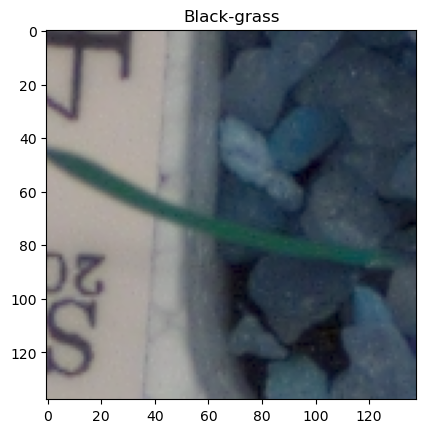

In [23]:
def plot_single_image(df,image_number):
    im  = cv2.imread(df.loc[image_number, 'image'])
    plt.title(df.loc[image_number, "target"])
    plt.imshow(im)

plot_single_image(images_df, 0)

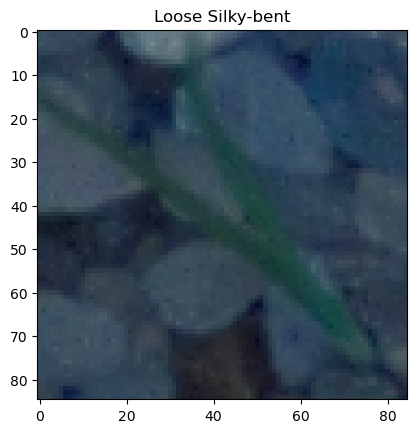

In [24]:
plot_single_image(images_df, 3000)

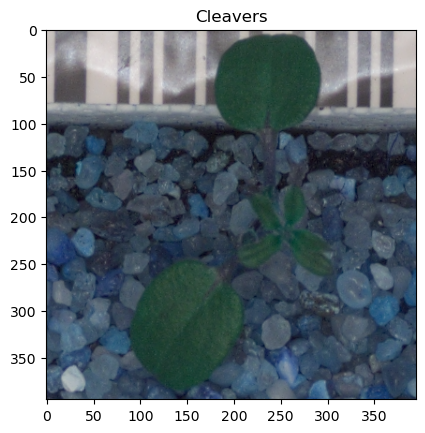

In [25]:
plot_single_image(images_df, 1000)

In [29]:
def plot_for_class(df, label):
    nb_rows = 3
    nb_cols = 3
    
    fig, axs = plt.subplots(nb_rows, nb_cols, figsize=(10,10))
    
    n = 0
    
    for i in range(0,nb_rows):
        for j in range(0,nb_cols):
            tmp = df[df["target"] == label ]
            tmp.reset_index(drop=True, inplace=True)
            im = cv2.imread(tmp.loc[n,'image'])
            axs[i,j].imshow(im)
            n+=1

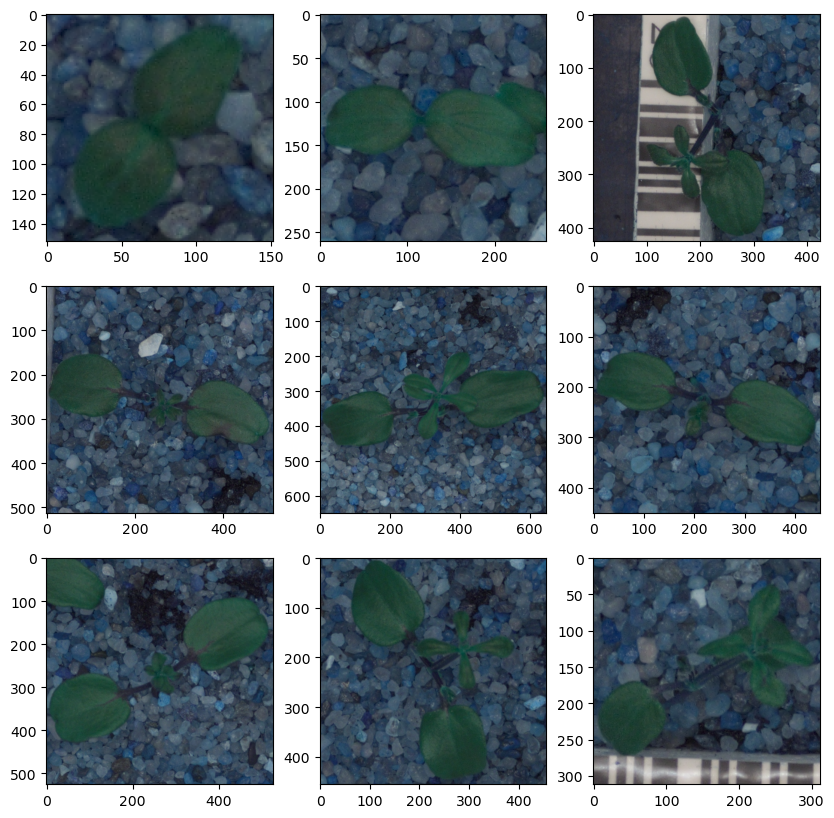

In [30]:
plot_for_class(images_df, 'Cleavers')

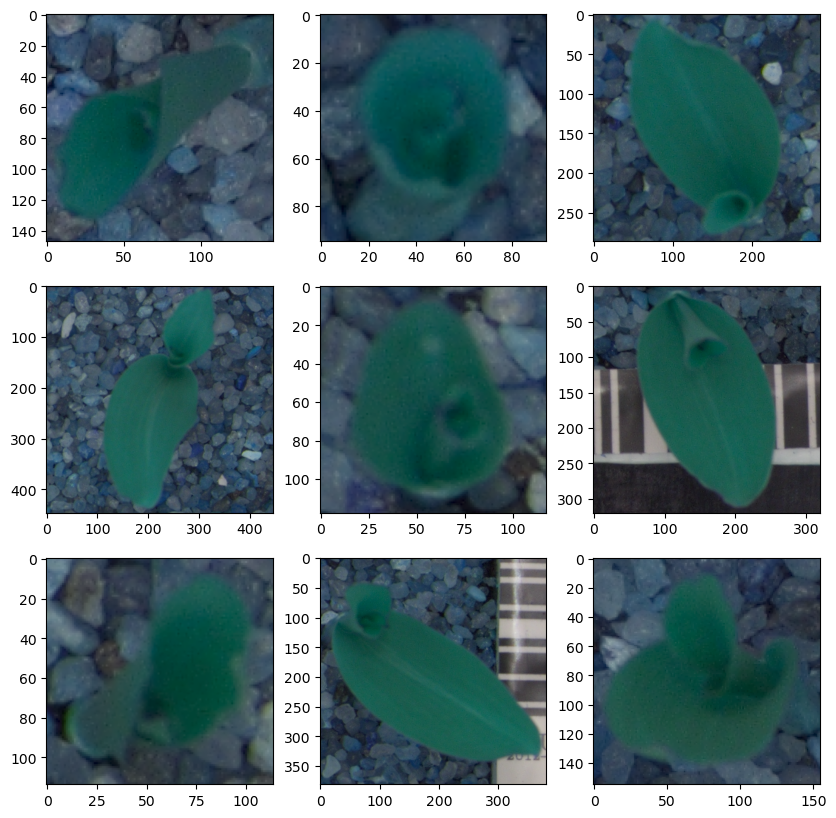

In [32]:
plot_for_class(images_df, 'Maize')

# Separate train/test

In [35]:
X_train, X_test, y_train, y_test = train_test_split(images_df["image"], images_df["target"], test_size=0.20, random_state=42)

In [36]:
print(X_train.shape)
print(X_test.shape)

(4431,)
(1108,)


In [37]:
X_train.head()

4373    C:\Users\nico_\Desktop\udemy_CNN\Shepherds Pur...
2389     C:\Users\nico_\Desktop\udemy_CNN\Fat Hen\398.png
2561      C:\Users\nico_\Desktop\udemy_CNN\Fat Hen\64.png
5022    C:\Users\nico_\Desktop\udemy_CNN\Small-flowere...
3862    C:\Users\nico_\Desktop\udemy_CNN\Scentless May...
Name: image, dtype: object

In [38]:
y_train.head()

4373              Shepherds Purse
2389                      Fat Hen
2561                      Fat Hen
5022    Small-flowered Cranesbill
3862            Scentless Mayweed
Name: target, dtype: object

### Reset index in target

In [39]:
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

### Percentage of images for each class

In [42]:
y_train.value_counts()/len(y_train)*100

Loose Silky-bent             14.330851
Common Chickweed             12.909050
Scentless Mayweed            11.148725
Small-flowered Cranesbill    10.403972
Fat Hen                       9.614083
Sugar beet                    8.056872
Charlock                      7.944031
Cleavers                      6.093433
Black-grass                   5.326111
Shepherds Purse               4.807041
Common wheat                  4.694200
Maize                         4.671632
Name: target, dtype: float64

In [43]:
y_test.value_counts()/len(y_test)*100

Common Chickweed             12.725632
Loose Silky-bent             11.462094
Small-flowered Cranesbill    10.379061
Scentless Mayweed            10.198556
Fat Hen                      10.108303
Sugar beet                    9.566787
Charlock                      9.025271
Black-grass                   6.588448
Cleavers                      5.866426
Shepherds Purse               5.505415
Maize                         4.512635
Common wheat                  4.061372
Name: target, dtype: float64

Les répartitions entre les class de train et test sont équilibrées

# Target preparation

In [60]:
encoder = LabelEncoder()
encoder.fit(y_train)

train_y = encoder.transform(y_train)
test_y = encoder.transform(y_test)

In [61]:
train_y

array([ 9,  5,  5, ..., 11, 11,  2])

In [62]:
test_y

array([ 9,  5, 10, ...,  3,  7,  0])

In [63]:
from sklearn.preprocessing import OneHotEncoder

In [64]:
# Utilisation de sparse_output=False car si Trtue, cela fait une matrice creuse et les 0 ne sont pas représentés
onehot_encoder = OneHotEncoder(sparse_output=False)
train_y = onehot_encoder.fit_transform(train_y.reshape(-1, 1))
test_y = onehot_encoder.transform(test_y.reshape(-1, 1))

In [65]:
train_y

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [66]:
test_y

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

# Resize the different size of the images to 150x150

### Shape : (nb observation, width, length, color)

In [142]:
IMAGE_SIZE = 150

In [143]:
def im_resize(image_path):
    im = cv2.imread(image_path)
    im = cv2.resize(im, (IMAGE_SIZE, IMAGE_SIZE))
    return im

### X_train

In [144]:
x_train = [im_resize(image_path) for image_path in X_train]

x_train = np.array(x_train, dtype='float32')

print(x_train.shape)  

(4431, 150, 150, 3)


### X_test

In [145]:
x_test = [im_resize(image_path) for image_path in X_test]

x_test = np.array(x_test, dtype='float32')

print(x_test.shape) 

(1108, 150, 150, 3)


# Model

In [218]:
kernel_size = (3,3)
pool_size = (2,2)
first_filters = 32
second_filters = 64
third_filters = 128

dropout_conv = 0.3
dropout_dense = 0.3

model = Sequential()
model.add(Conv2D(first_filters, kernel_size, activation='relu', 
                input_shape = (IMAGE_SIZE, IMAGE_SIZE, 3)))
model.add(Conv2D(first_filters, kernel_size, activation='relu'))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Dropout(dropout_conv))

model.add(Conv2D(second_filters, kernel_size, activation='relu'))
model.add(Conv2D(second_filters, kernel_size, activation='relu'))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Dropout(dropout_conv))

model.add(Conv2D(third_filters, kernel_size, activation='relu'))
model.add(Conv2D(third_filters, kernel_size, activation='relu'))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Dropout(dropout_conv))

model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(dropout_dense))
model.add(Dense(12, activation = 'softmax'))

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_40 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 conv2d_41 (Conv2D)          (None, 146, 146, 32)      9248      
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 73, 73, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_31 (Dropout)        (None, 73, 73, 32)        0         
                                                                 
 conv2d_42 (Conv2D)          (None, 71, 71, 64)        18496     
                                                                 
 conv2d_43 (Conv2D)          (None, 69, 69, 64)        36928     
                                                      

In [219]:
model.compile(Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics= ['accuracy'])

In [220]:
batch_size = 10
epochs = 8

In [221]:
history = model.fit(x = x_train, y = train_y, 
                    batch_size = batch_size, 
                    validation_split = 0.1,
                    epochs = epochs,
                    verbose= 2)

Epoch 1/8
399/399 - 361s - loss: 0.3530 - accuracy: 0.2443 - val_loss: 0.2737 - val_accuracy: 0.5068 - 361s/epoch - 906ms/step
Epoch 2/8
399/399 - 360s - loss: 0.2019 - accuracy: 0.4971 - val_loss: 0.1800 - val_accuracy: 0.6554 - 360s/epoch - 903ms/step
Epoch 3/8
399/399 - 367s - loss: 0.1645 - accuracy: 0.6080 - val_loss: 0.1679 - val_accuracy: 0.6577 - 367s/epoch - 919ms/step
Epoch 4/8
399/399 - 377s - loss: 0.1419 - accuracy: 0.6770 - val_loss: 0.1327 - val_accuracy: 0.7523 - 377s/epoch - 944ms/step
Epoch 5/8
399/399 - 377s - loss: 0.1217 - accuracy: 0.7389 - val_loss: 0.1387 - val_accuracy: 0.7455 - 377s/epoch - 944ms/step
Epoch 6/8
399/399 - 373s - loss: 0.1091 - accuracy: 0.7662 - val_loss: 0.1202 - val_accuracy: 0.7680 - 373s/epoch - 934ms/step
Epoch 7/8
399/399 - 366s - loss: 0.0938 - accuracy: 0.8064 - val_loss: 0.1055 - val_accuracy: 0.7905 - 366s/epoch - 917ms/step
Epoch 8/8
399/399 - 385s - loss: 0.0810 - accuracy: 0.8415 - val_loss: 0.1007 - val_accuracy: 0.7995 - 385s/epo

In [222]:
model.save('my_model.h5')

C:\Users\nico_\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [223]:
model.save('my_model.keras')

<Figure size 640x480 with 0 Axes>

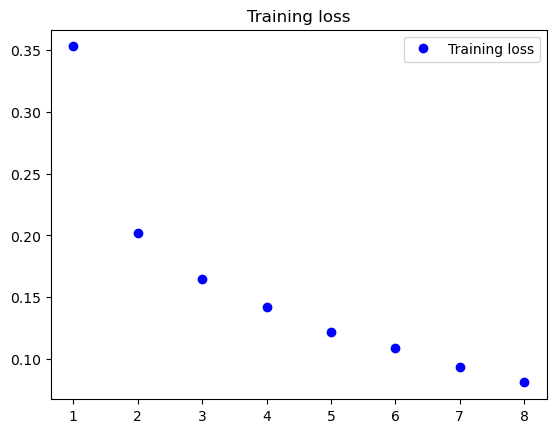

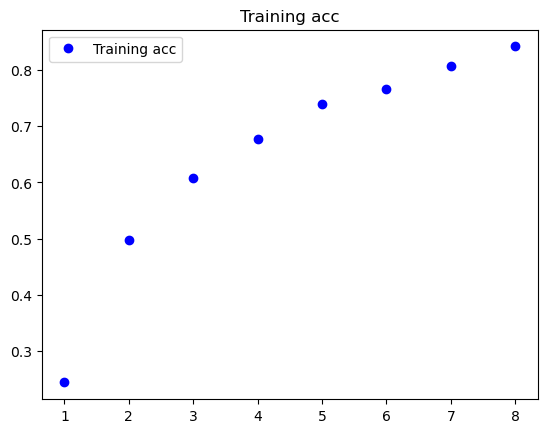

<Figure size 640x480 with 0 Axes>

In [224]:
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(1, len(acc) +1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.title('Training loss')
plt.legend()
plt.figure()

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.title('Training acc')
plt.legend()
plt.figure()

In [225]:
from sklearn.metrics import accuracy_score

In [228]:
predictions = model.predict(x_test)

35/35 [==============================] - 19s 533ms/step


In [233]:
# Convertion des probabilités en indices de classes
pred = np.argmax(predictions, axis=1)

In [234]:
true_classes = np.argmax(test_y, axis=1)

In [235]:
accuracy_score(true_classes, pred, normalize=True, sample_weight=None)

0.7969314079422383

# Matrice de confusion

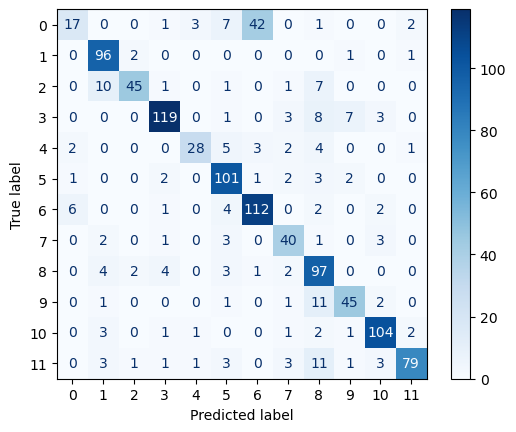

In [237]:
from sklearn.metrics import ConfusionMatrixDisplay

num_classes = 12

cnf_matrix = confusion_matrix(true_classes, pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels=range(num_classes))
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Precision score

In [238]:
from sklearn.metrics import precision_score

precision = precision_score(true_classes, pred, average='weighted')
# average= 'weighted' : Calcule la précision pour chaque classe, puis fait la moyenne en pondérant 
# par le nombre d'instances de chaque classe. Cela peut être utile si les classes sont déséquilibrées.

precision

0.803378965699584

# Recall score

In [239]:
from sklearn.metrics import recall_score

recall_score(true_classes, pred, average='weighted')

0.7969314079422383

# F1 score

In [217]:
from sklearn.metrics import f1_score

f1_score(true_classes, predictions, average='weighted')

0.7172857290592392